# Ejercicios de Análisis de Datos de Ventas

En este notebook se proponen 10 ejercicios diferentes utilizando un dataset de ventas. Cada ejercicio requiere aplicar operaciones de agrupación (*groupby*), conteo de valores (*value_counts*), cálculos de medias, y generar visualizaciones para responder preguntas específicas.

El dataset de ejemplo tiene la siguiente estructura:

| InvoiceNo | StockCode | Description                                    | Quantity | InvoiceDate        | UnitPrice | CustomerID | Country        |
|-----------|-----------|------------------------------------------------|----------|--------------------|-----------|------------|----------------|
| 536365    | 85123A    | WHITE HANGING HEART T-LIGHT HOLDER             | 6        | 12/1/2010 8:26     | 2.55      | 17850.0    | United Kingdom |
| 536365    | 71053     | WHITE METAL LANTERN                            | 6        | 12/1/2010 8:26     | 3.39      | 17850.0    | United Kingdom |
| 536365    | 84406B    | CREAM CUPID HEARTS COAT HANGER                 | 8        | 12/1/2010 8:26     | 2.75      | 17850.0    | United Kingdom |
| 536365    | 84029G    | KNITTED UNION FLAG HOT WATER BOTTLE            | 6        | 12/1/2010 8:26     | 3.39      | 17850.0    | United Kingdom |

Puedes ampliar el dataset según sea necesario para los ejercicios.

In [1]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
!unzip customer_segmentation.csv.zip

--2025-03-27 01:18:54--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip [following]
--2025-03-27 01:18:54--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7548720 (7.2M) [application/zip]
Saving to: ‘customer_segmentation.csv.zip’

customer_s

## Preparación del Dataset

Primero, importamos las librerías necesarias, creamos el DataFrame de ejemplo y realizamos las conversiones correspondientes.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Creación del DataFrame de ejemplo
data = pd.read_csv('customer_segmentation.csv',encoding="latin-1")

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
# Convertir InvoiceDate a tipo datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Mostrar el DataFrame
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Ejercicio 1: Exploración del Dataset

Realiza una exploración básica del dataset: muestra las primeras filas, la información general (con `.info()`) y verifica si hay datos nulos.

In [6]:
# prompt: Realiza una exploración básica del dataset: muestra las primeras filas, la información general (con .info()) y verifica si hay datos nulos.

# Mostrar las primeras filas del dataset
print(data.head())

# Mostrar información general del dataset
print(data.info())

# Verificar si hay datos nulos
print(data.isnull().sum())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       -----------

## Ejercicio 2: Agrupación por País

Agrupa los datos por la columna `Country` para:
- Calcular el total de `Quantity` vendido por país.
- Calcular la media de `UnitPrice` por país.

Visualiza el total de `Quantity` por país utilizando un gráfico de barras. Dame los 5 primeros

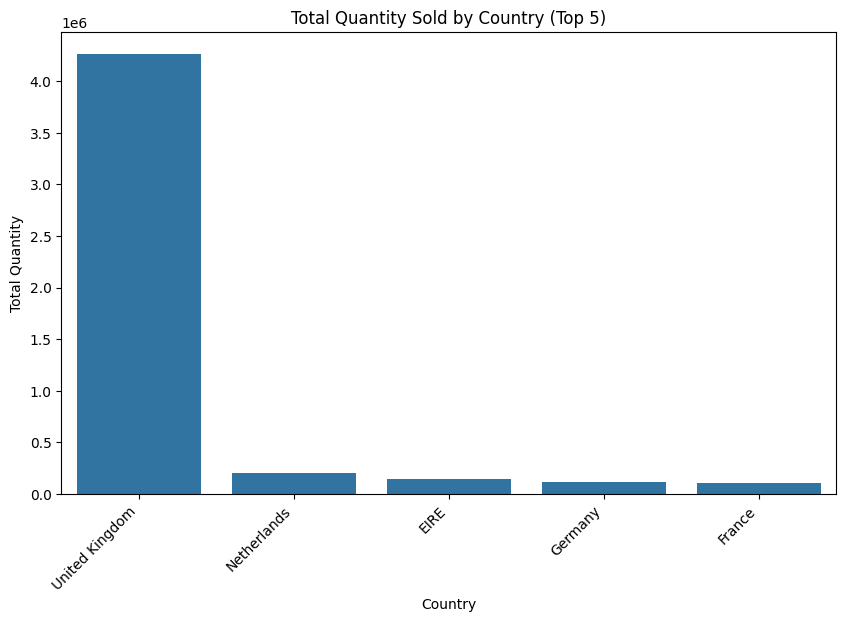

           Quantity  UnitPrice
Country                       
Australia     83653   3.220612
Austria        4827   4.243192
Bahrain         260   4.556316
Belgium       23152   3.644335
Brazil          356   4.456250


In [8]:
# prompt: Agrupa los datos por la columna Country para:
# Calcular el total de Quantity vendido por país.
# Calcular la media de UnitPrice por país.
# Visualiza el total de Quantity por país utilizando un gráfico de barras. Dame los 5 primeros

import matplotlib.pyplot as plt
# Agrupación por país y cálculo del total de Quantity y la media de UnitPrice
country_data = data.groupby('Country').agg({'Quantity': 'sum', 'UnitPrice': 'mean'})

# Visualización del total de Quantity por país (5 primeros)
top_5_countries = country_data['Quantity'].sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_countries.index, y=top_5_countries.values)
plt.title('Total Quantity Sold by Country (Top 5)')
plt.xlabel('Country')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45, ha='right')
plt.show()

print(country_data.head())


## Ejercicio 3: Frecuencia de StockCode

Agrupa el DataFrame por `StockCode` y cuenta la frecuencia de cada producto. Utiliza `value_counts` para verificar el resultado.

Visualiza los StockCode más frecuentes con un gráfico de barras horizontal. Dame los 10 primeros

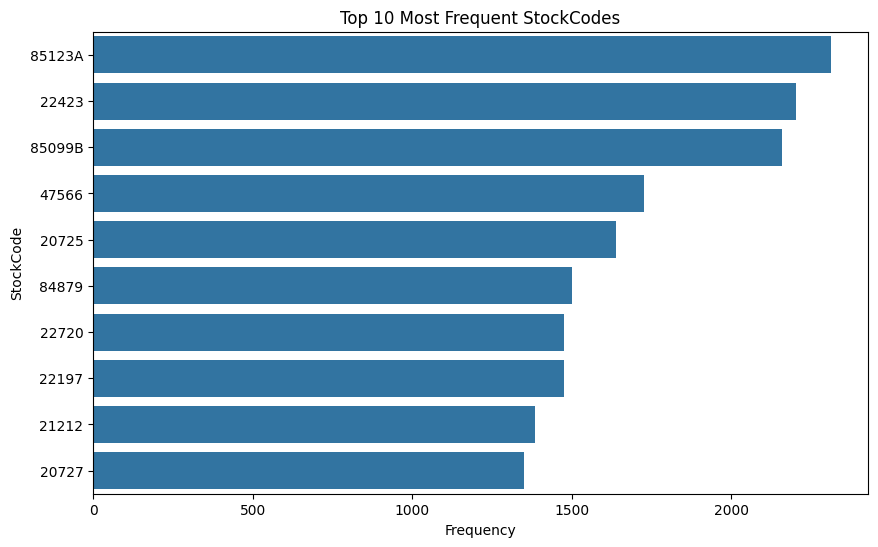

In [9]:
# prompt: Agrupa el DataFrame por StockCode y cuenta la frecuencia de cada producto. Utiliza value_counts para verificar el resultado.
# Visualiza los StockCode más frecuentes con un gráfico de barras horizontal. Dame los 10 primeros

import matplotlib.pyplot as plt
# Agrupa por StockCode y cuenta la frecuencia de cada producto
stock_counts = data.groupby('StockCode')['StockCode'].count()

# Verifica el resultado con value_counts
stock_counts_value_counts = data['StockCode'].value_counts()

# Visualiza los StockCode más frecuentes con un gráfico de barras horizontal (10 primeros)
top_10_stock_counts = stock_counts.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_stock_counts.values, y=top_10_stock_counts.index, orient='h')
plt.title('Top 10 Most Frequent StockCodes')
plt.xlabel('Frequency')
plt.ylabel('StockCode')
plt.show()


## Ejercicio 4: Ventas Totales por Factura

1. Crea una nueva columna llamada `TotalPrice` que sea el producto de `Quantity` y `UnitPrice`.
2. Agrupa los datos por `InvoiceNo` y calcula la suma de `TotalPrice` para cada factura.
3. Calcula la factura promedio (media) del total de ventas por factura.

Visualiza la distribución de los totales de factura con un histograma.

La factura promedio es: 376.3609240926641


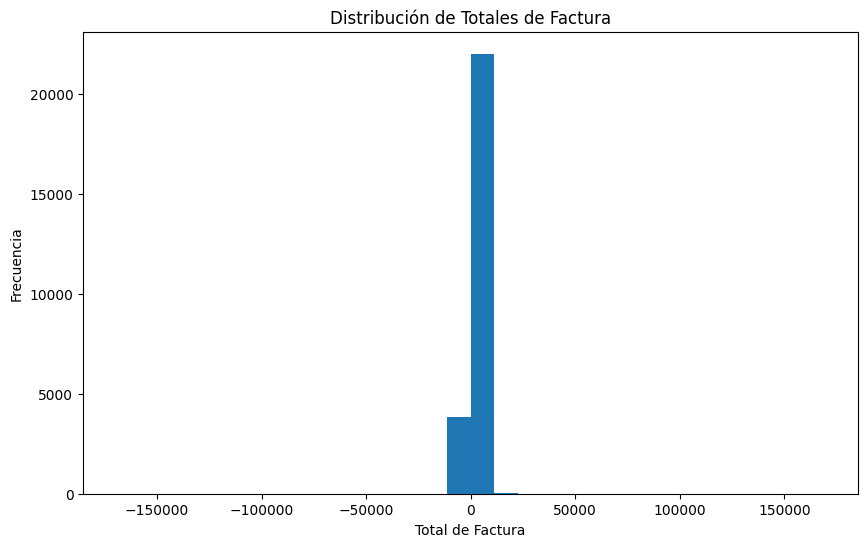

In [10]:
# prompt: Crea una nueva columna llamada TotalPrice que sea el producto de Quantity y UnitPrice.
# Agrupa los datos por InvoiceNo y calcula la suma de TotalPrice para cada factura.
# Calcula la factura promedio (media) del total de ventas por factura.
# Visualiza la distribución de los totales de factura con un histograma.

import matplotlib.pyplot as plt
# 1. Crea una nueva columna llamada TotalPrice que sea el producto de Quantity y UnitPrice.
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# 2. Agrupa los datos por InvoiceNo y calcula la suma de TotalPrice para cada factura.
invoice_totals = data.groupby('InvoiceNo')['TotalPrice'].sum()

# 3. Calcula la factura promedio (media) del total de ventas por factura.
average_invoice_total = invoice_totals.mean()
print(f"La factura promedio es: {average_invoice_total}")

# Visualiza la distribución de los totales de factura con un histograma.
plt.figure(figsize=(10, 6))
plt.hist(invoice_totals, bins=30)
plt.title('Distribución de Totales de Factura')
plt.xlabel('Total de Factura')
plt.ylabel('Frecuencia')
plt.show()


## Ejercicio 5: Evolución Temporal de Ventas

Utiliza la columna `InvoiceDate` para visualizar cómo evoluciona el valor de `TotalPrice` a lo largo del tiempo.

Realiza un gráfico de líneas donde el eje x sea la fecha y el eje y sea `TotalPrice`.

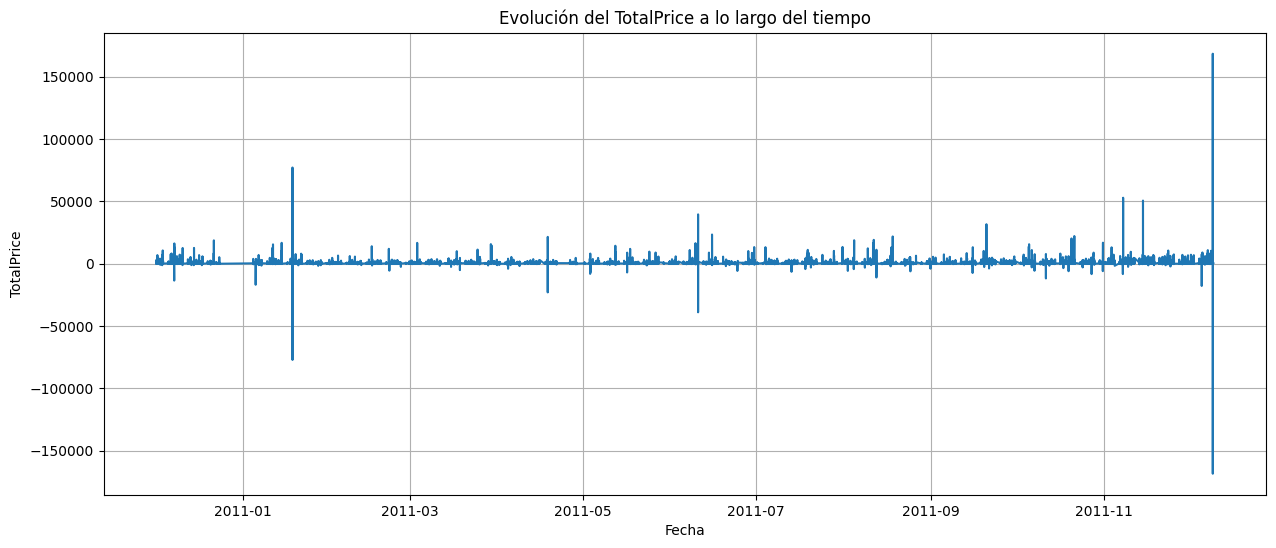

In [11]:
# prompt: Utiliza la columna InvoiceDate para visualizar cómo evoluciona el valor de TotalPrice a lo largo del tiempo.
# Realiza un gráfico de líneas donde el eje x sea la fecha y el eje y sea TotalPrice.

import matplotlib.pyplot as plt
# Agrupar por fecha y sumar el TotalPrice
daily_sales = data.groupby('InvoiceDate')['TotalPrice'].sum()

# Crear el gráfico de líneas
plt.figure(figsize=(15, 6))
plt.plot(daily_sales.index, daily_sales.values)
plt.title('Evolución del TotalPrice a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('TotalPrice')
plt.grid(True)
plt.show()


## Ejercicio 6: Boxplot de UnitPrice por País

Crea un boxplot para visualizar la distribución de `UnitPrice` en función de `Country`.

Este gráfico ayudará a identificar la dispersión y posibles valores atípicos en los precios.

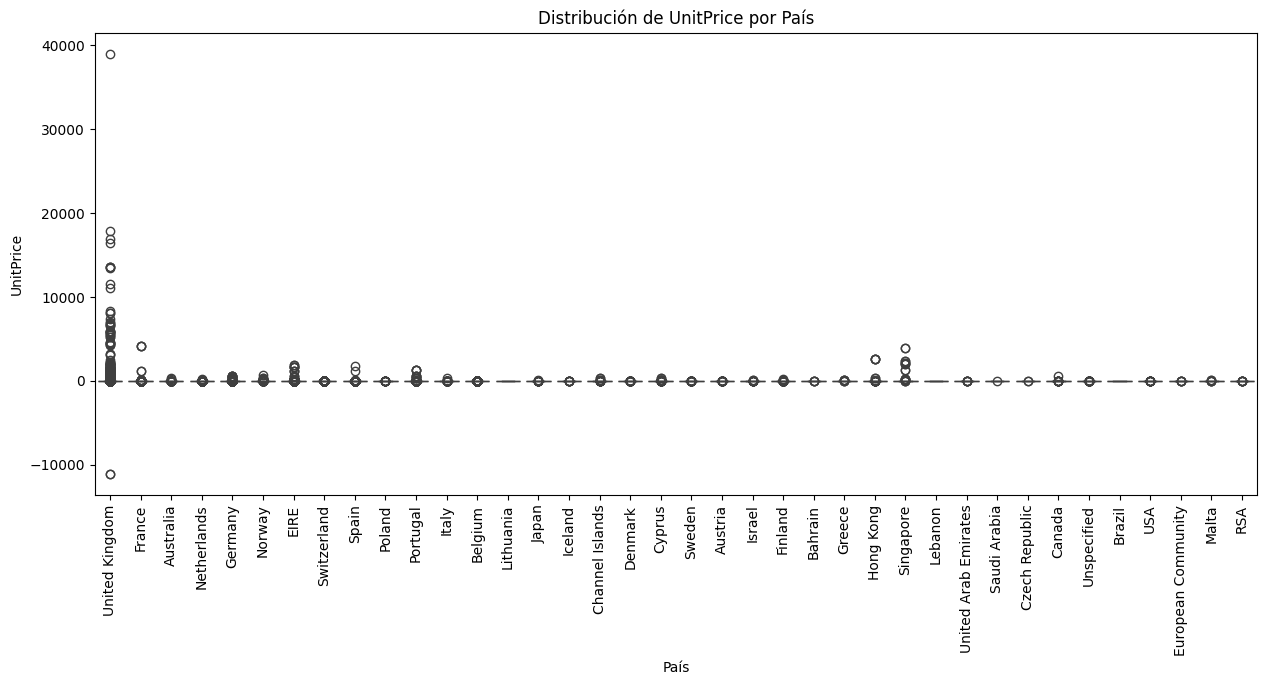

In [12]:
# prompt: Crea un boxplot para visualizar la distribución de UnitPrice en función de Country.
# Este gráfico ayudará a identificar la dispersión y posibles valores atípicos en los precios.

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
sns.boxplot(x='Country', y='UnitPrice', data=data)
plt.title('Distribución de UnitPrice por País')
plt.xlabel('País')
plt.ylabel('UnitPrice')
plt.xticks(rotation=90)
plt.show()


## Ejercicio 7: Scatter Plot entre Quantity y UnitPrice

Realiza un scatter plot para analizar la relación entre `Quantity` y `UnitPrice`.

Observa si existe alguna tendencia o correlación entre la cantidad y el precio unitario.

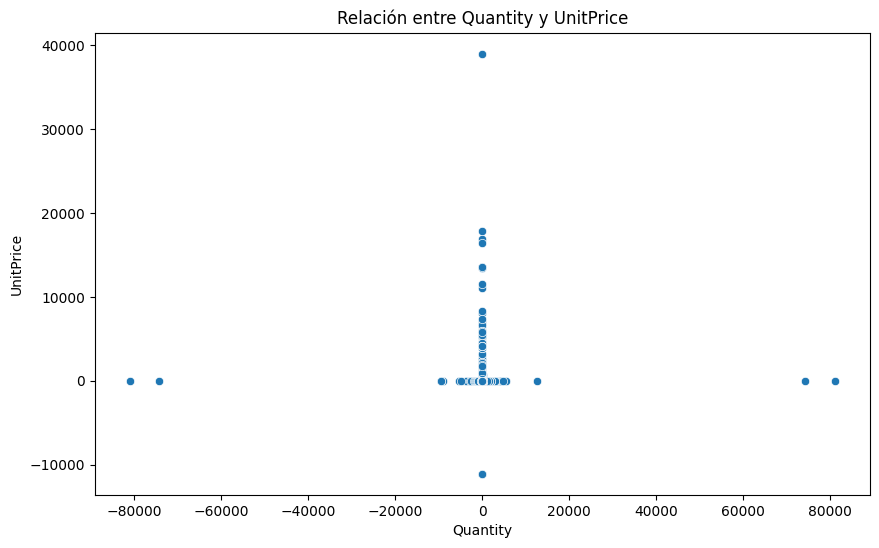

In [13]:
# prompt: Realiza un scatter plot para analizar la relación entre Quantity y UnitPrice.
# Observa si existe alguna tendencia o correlación entre la cantidad y el precio unitario.

import matplotlib.pyplot as plt
# Ejercicio 7: Scatter Plot entre Quantity y UnitPrice

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', data=data)
plt.title('Relación entre Quantity y UnitPrice')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()


## Ejercicio 8: Distribución de Clientes por País

Utilizando la columna `Country`, crea un gráfico de pastel (pie chart) que muestre la proporción de registros por país. Elimine los que tengan muy poco porcentaje)

Este gráfico es útil para visualizar la distribución geográfica de las ventas.

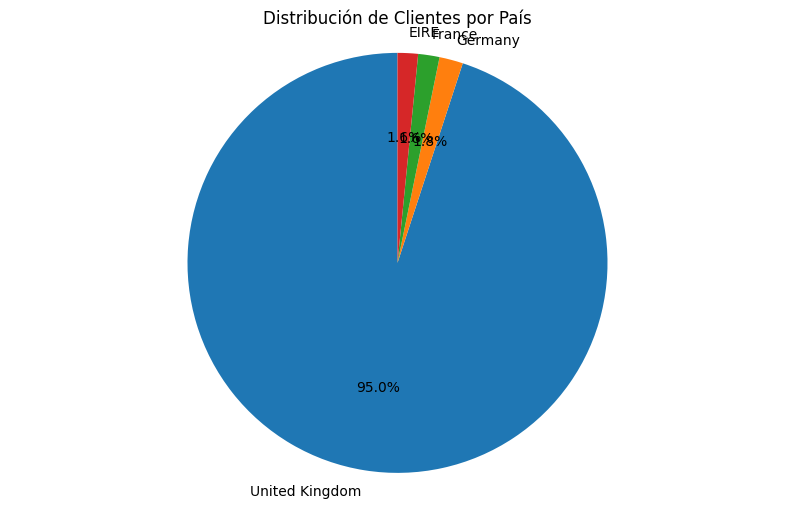

In [14]:
# prompt: Utilizando la columna Country, crea un gráfico de pastel (pie chart) que muestre la proporción de registros por país. Elimine los que tengan muy poco porcentaje)
# Este gráfico es útil para visualizar la distribución geográfica de las ventas.

import matplotlib.pyplot as plt
# Ejercicio 8: Distribución de Clientes por País

country_counts = data['Country'].value_counts()

# Definir un umbral para eliminar países con poco porcentaje
threshold = 0.01  # 1%

# Filtrar los países que cumplen el umbral
filtered_country_counts = country_counts[country_counts / country_counts.sum() > threshold]

# Crear el gráfico de pastel
plt.figure(figsize=(10, 6))
plt.pie(filtered_country_counts, labels=filtered_country_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Clientes por País')
plt.axis('equal')  # Asegurar que el círculo sea un círculo
plt.show()


## Ejercicio 9: Evolución del Precio Unitario Promedio

Agrupa los datos por la fecha (utilizando la columna `InvoiceDate`) para calcular el precio unitario promedio diario y visualízalo con un gráfico de líneas. (hagalo mensual )


Esta visualización permite observar tendencias en el precio a lo largo del tiempo.

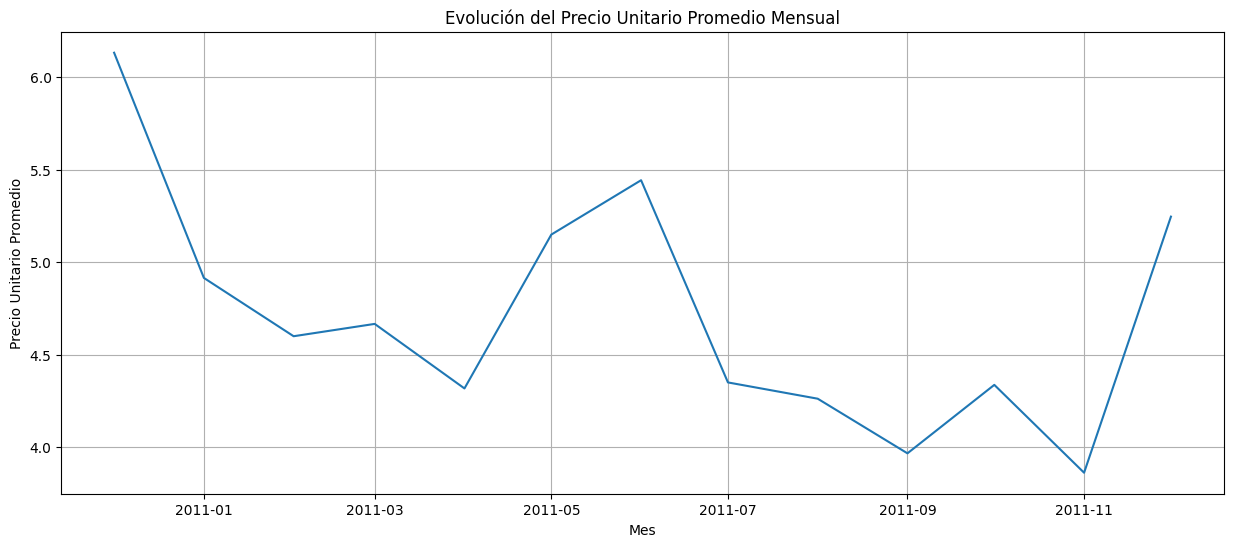

In [15]:
# prompt: Agrupa los datos por la fecha (utilizando la columna InvoiceDate) para calcular el precio unitario promedio diario y visualízalo con un gráfico de líneas. (hagalo mensual )
# Esta visualización permite observar tendencias en el precio a lo largo del tiempo.

import matplotlib.pyplot as plt
# Agrupar por mes y calcular el precio unitario promedio mensual
monthly_average_price = data.groupby(data['InvoiceDate'].dt.to_period('M'))['UnitPrice'].mean()

# Crear el gráfico de líneas
plt.figure(figsize=(15, 6))
plt.plot(monthly_average_price.index.to_timestamp(), monthly_average_price.values)
plt.title('Evolución del Precio Unitario Promedio Mensual')
plt.xlabel('Mes')
plt.ylabel('Precio Unitario Promedio')
plt.grid(True)
plt.show()


## Ejercicio 10: Frecuencia de Productos por Descripción

Agrupa el dataset por la columna `Description` y cuenta la frecuencia de cada producto.

Visualiza los 5 productos más frecuentes con un gráfico de barras vertical.

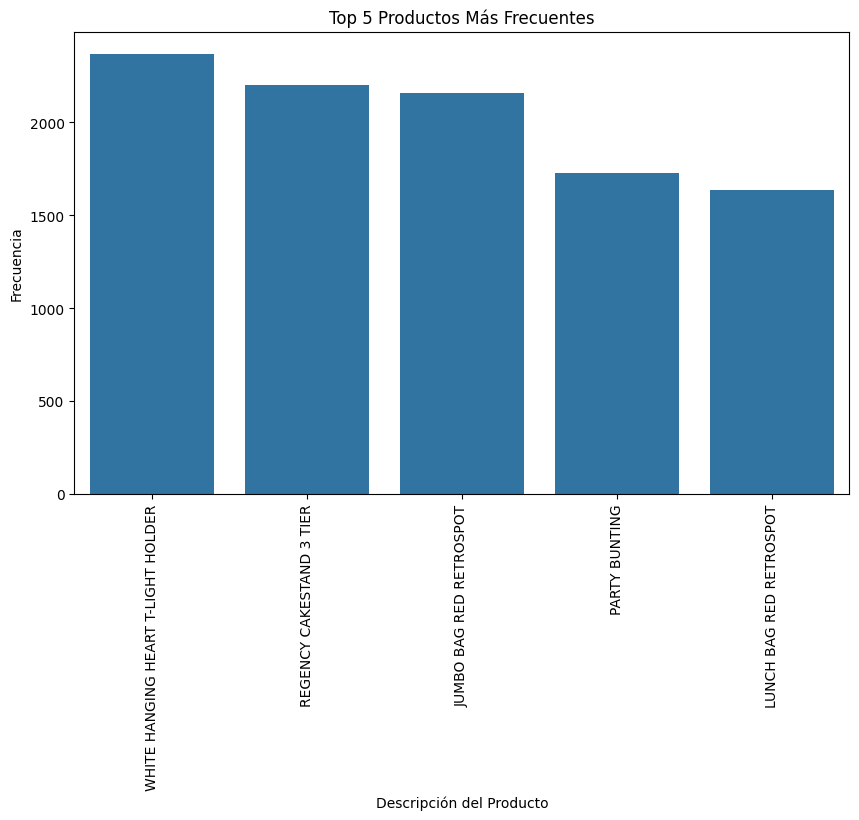

In [16]:
# prompt: Agrupa el dataset por la columna Description y cuenta la frecuencia de cada producto.
# Visualiza los 5 productos más frecuentes con un gráfico de barras vertical.

import matplotlib.pyplot as plt
# Ejercicio 10: Frecuencia de Productos por Descripción

# Agrupa el dataset por la columna Description y cuenta la frecuencia de cada producto.
product_frequency = data.groupby('Description')['Description'].count()

# Visualiza los 5 productos más frecuentes con un gráfico de barras vertical.
top_5_products = product_frequency.sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_products.index, y=top_5_products.values)
plt.title('Top 5 Productos Más Frecuentes')
plt.xlabel('Descripción del Producto')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()


## Conclusiones Generales

En este notebook se han propuesto 10 ejercicios que cubren desde la exploración básica del dataset hasta operaciones de agrupación y la generación de diferentes tipos de gráficos para responder a preguntas de análisis de ventas.

Recuerda comentar tu código y documentar tus hallazgos en celdas de markdown para que el proceso quede bien explicado.